# 장애인콜택시 대기시간 예측
## 단계3. 모델링

## 0.미션

* 1.시계열 데이터에 맞는 전처리
    * 데이터가 2015 ~ 2022년까지 데이터 입니다.
    * 이 중 2022년 10월 ~ 2022년 12월까지(3개월)의 데이터는 성능 검증용으로 사용합니다.
    * 나머지 데이터를 이용하여 학습 및 튜닝을 수행합니다.
    * 이를 위한 데이터 전처리를 수행하시오.
* 2.모델 최적화
    * 머신러닝 
        * 알고리즘 중 3가지 이상을 선정하여 모델링을 수행합니다.
        * 각각 알고리즘에 맞는 튜닝 방법으로 최적의 모델을 만듭니다.
    * 딥러닝
        * 모델 구조를 2가지 이상을 생성하고 모델링을 수행합니다.
        * epochs, learning_rate 등을 조절하며 성능을 튜닝합니다.
    * 성능 평가
        * 시계열 그래프로 모델의 실제값과 예측값을 시각화하여 비교합니다.
        * 성능 지표 (MAE, MAPE) 를 사용해 가장 성능이 높은 모델을 선정합니다.

## 1.환경설정

### (1) 라이브러리 불러오기

* **세부 요구사항**
    - 기본적으로 필요한 라이브러리를 import 하도록 코드가 작성되어 있습니다.
    - 필요하다고 판단되는 라이브러리를 추가하세요.

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import joblib

# 필요하다고 판단되는 라이브러리를 추가하세요.
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

### (2) 데이터 로딩
* 주어진 데이터셋
    * [2.탐색적 데이터분석] 단계에서 저장한 파일 : data2.pkl
* 다음의 두가지 방법 중 하나를 선택하시오.
    * 1) 로컬 수행(Ananconda)
    * 2) 구글콜랩

#### 1) 로컬 수행(Anaconda)
* project 폴더에 필요한 파일들을 넣고, 본 파일을 열었다면, 별도 경로 지정이 필요하지 않습니다.

In [ ]:
path = ''

#### 2) 구글 콜랩 수행

* 구글 드라이브 연결

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
path = '/content/drive/MyDrive/project/'

#### 3) 데이터 읽어오기

In [5]:
file2 = 'data2.pkl'
file1 = 'data1.pkl'

In [6]:
data = joblib.load(file1)

## 2.데이터 준비
* **세부요구사항**
    * NaN에 대한 조치를 수행하시오.
        * rolling 혹은 shift로 발생된 초기 행의 NaN은 삭제해도 무방합니다.
    * 가변수화 : 범주형에 대해서 가변수화를 수행합니다.
    * 데이터분할
        * 시계열 데이터 특성에 맞게 분할합니다.
        * 마지막 91일(3개월) 데이터를 검증셋으로 사용합니다.

### (1) NA 조치

In [9]:
data.isna().sum()

date               0
driving_car        0
reception          0
boarding           0
avg_waiting        0
avg_fee            0
avg_distance       0
week               0
year               0
month              0
weekday            0
day                0
temp_max           0
temp_min           0
rain(mm)           0
humidity_max(%)    0
humidity_min(%)    0
sunshine(MJ/m2)    0
is_holiday         0
boarding_rate      0
dtype: int64

In [12]:
data.drop('date',axis=1, inplace=True)

### (2) 가변수화

In [15]:
df1 = pd.get_dummies(data=data, columns=['year','month','weekday','is_holiday'], drop_first=True)

In [16]:
df1

,driving_car,reception,boarding,avg_waiting,avg_fee,avg_distance,week,day,temp_max,temp_min,...,month_10,month_11,month_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,is_holiday_1
0,213,1023,924,23.2,2427,10764,1,1,-2.0,-8.9,...,0,0,0,0,0,1,0,0,0,1
1,420,3158,2839,17.2,2216,8611,1,2,2.4,-9.2,...,0,0,0,0,0,0,1,0,0,0
2,209,1648,1514,26.2,2377,10198,1,3,8.2,0.2,...,0,0,0,0,0,0,0,1,0,0
3,196,1646,1526,24.5,2431,10955,1,4,7.9,-0.9,...,0,0,0,0,0,0,0,0,1,0
4,421,4250,3730,26.2,2214,8663,2,5,4.1,-7.4,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2916,603,5555,4605,39.2,2163,7889,52,26,3.0,-7.3,...,0,0,1,0,0,0,0,0,0,0
2917,669,5635,4654,44.4,2198,8178,52,27,-0.3,-5.4,...,0,0,1,1,0,0,0,0,0,0
2918,607,5654,4648,44.8,2161,7882,52,28,1.7,-7.8,...,0,0,1,0,1,0,0,0,0,0
2919,581,5250,4247,52.5,2229,8433,52,29,2.1,-4.0,...,0,0,1,0,0,1,0,0,0,0


### (3) 데이터분할
* **세부요구사항**
    * 마지막 91일 간의 데이터를 검증 셋으로 만듭니다. (2022-10-01 ~ )
    * 이 기간의 날짜 리스트를 별도로 저장하여, 모델 검증시 시각화할 때 활용합니다.

#### 1) x, y 나누기

In [17]:
target='avg_waiting'
x = df1.drop(target, axis=1)
y = df1[target]

#### 2) train : validation 나누기
* 힌트 : train_test_split(  ,   ,  test_size = 91, shuffle = False) 

In [19]:
x_train, x_val, y_train, y_val = train_test_split(x,y,test_size=91,shuffle=False)

### (4) Scaling
* KNN, SVM 알고리즘 및 DL을 적용하기 위해서는 스케일링을 해야 합니다.

In [20]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_val = scaler.transform(x_val)

## 3.모델링
* **세부요구사항**
    * 머신러닝 알고리즘 중 3가지 이상을 사용하여 모델을 만들고 튜닝을 수행합니다.
    * 딥러닝 모델 구조 2가지 이상을 설계하고 모델을 생성합니다.
    * 성능 측정은 MAE, MAPE로 수행합니다.
    * 모델링 후 실제값과 예측값을 시각화(라인차트)하여 분석합니다.

In [21]:
model = SVR()

In [22]:
model.fit(x_train,y_train)

SVR()

In [24]:
y_pred = model.predict(x_val)

In [27]:
print(mean_absolute_error(y_val,y_pred))
print(mean_absolute_percentage_error(y_val, y_pred))

4.107508077221042
0.09464149247176522


### (1) 머신러닝

#### 1) 모델1

In [54]:
from xgboost import XGBClassifier

#### 2) 모델2

#### 3) 모델3

### (2) 딥러닝

In [28]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [29]:
x_train.shape

(2830, 39)

#### 1) 모델1

In [55]:
tf.keras.backend.clear_session()

In [48]:
model = Sequential()
model.add(Input(shape=(39,)))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation ='relu'))
model.add(Dropout(0.2))
model.add(Dense(1))

In [49]:
model.compile(optimizer='adam',loss='mae')

In [50]:
es = EarlyStopping(monitor='val_loss',
                   min_delta=0,
                   patience=5,
                   restore_best_weights=True,
                   verbose=1)

In [51]:
mc = ModelCheckpoint('best_model.h5',
                     monitor='val_loss',
                     save_best_only=True,
                    verbose=1)

In [52]:
hist = model.fit(x_train, y_train,batch_size=16, epochs=30,callbacks=[es,mc],validation_data=(x_val, y_val),verbose=1)

Epoch 1/30
161/177 [==========================>...] - ETA: 0s - loss: 21.6894
Epoch 1: val_loss improved from inf to 7.84651, saving model to best_model.h5
177/177 [==============================] - 1s 3ms/step - loss: 20.6981 - val_loss: 7.8465
Epoch 2/30
152/177 [========================>.....] - ETA: 0s - loss: 9.8135
Epoch 2: val_loss improved from 7.84651 to 4.33321, saving model to best_model.h5
177/177 [==============================] - 0s 2ms/step - loss: 9.6496 - val_loss: 4.3332
Epoch 3/30
158/177 [=========================>....] - ETA: 0s - loss: 8.8403
Epoch 3: val_loss did not improve from 4.33321
177/177 [==============================] - 0s 2ms/step - loss: 8.8103 - val_loss: 4.5052
Epoch 4/30
166/177 [===========================>..] - ETA: 0s - loss: 8.7610
Epoch 4: val_loss improved from 4.33321 to 3.83914, saving model to best_model.h5
177/177 [==============================] - 0s 2ms/step - loss: 8.7410 - val_loss: 3.8391
Epoch 5/30
162/177 [=========================

#### 2) 모델2

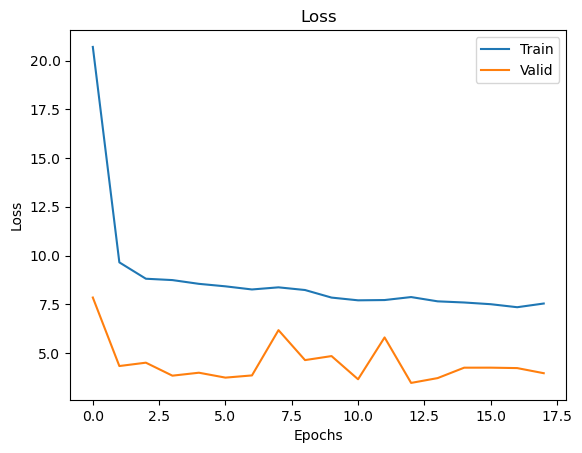

In [53]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train','Valid'])

## 4.모델 비교
* **세부요구사항**
    * 모델링 단계에서 생성한 모든 모델의 성능을 하나로 모아서 비교합니다.
    * 가장 성능이 높은 모델을 선정합니다.

In [38]:
hist